Name: Josemaria Macedo Carrillo\
Ttile: Land Matrix Data Exploration\
Created: 06/22/23\
Last modified: 07/06/23\
DSI

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from deep_translator import GoogleTranslator
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

pd.set_option('display.float_format', lambda x: '%.4f' % x)

[nltk_data] Downloading package punkt to /Users/jmacedoc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jmacedoc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jmacedoc/nltk_data...


In [5]:
kernel = pd.read_csv("../data/import genius/kernel_10000_en.csv", parse_dates=["EXPORT DATE"])

print("Columns: ", kernel.dtypes)

# All custom office values are NaN
print("Custom office values: ", kernel["CUSTOMS VALUE"].dropna().values)

# We still have to get data from 2011 to 2021
print("Min year: ",kernel["EXPORT DATE"].dt.year.min(skipna=True))
print("Max year: ", kernel["EXPORT DATE"].dt.year.max(skipna=True))

kernel.head()



Columns:  Unnamed: 0                                   int64
PRODUCT                                     object
HS CODE                                      int64
CONSIGNEE                                   object
CONSIGNEE ADDRESS                          float64
SHIPPER                                     object
SHIPPER ADDRESS                            float64
EXPORT DATE                         datetime64[ns]
QUANTITY                                   float64
WEIGHT (KG)                                float64
INVOICE PRICE (UAH)                        float64
TOTAL INVOICE VALUE (USD)                  float64
INVOICE PRICE IN KILOGRAMS (USD)           float64
ITEM UNIT                                  float64
ITEM NUMBER                                float64
CUSTOMS VALUE                              float64
CUSTOMS OFFICE CODE                          int64
COUNTRY OF ORIGIN                          float64
DESTINATION COUNTRY                         object
PLACE OF DELIVERY    

,Unnamed: 0,PRODUCT,HS CODE,CONSIGNEE,CONSIGNEE ADDRESS,SHIPPER,SHIPPER ADDRESS,EXPORT DATE,QUANTITY,WEIGHT (KG),...,PLACE OF DELIVERY,DELIVERY TERMS,DECLARATION NO.,CURRENCY RATIO,SENDER CODE,BANK NAME,product_en,year,month,weight_ton
0,0,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,OMANI GULF FOOD COMPANY LLC P O BOX 43 P C 217...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23930.0000,...,NaN,FCA UA ПОЛТАВА,4138,NaN,31454383,NaN,"SUNFLOWER, SAFFLOWER OR COTTON OILS AND THEIR ...",2023,3,23.9300
1,1,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,OMANI GULF FOOD COMPANY LLC P O BOX 43 P C 217...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23930.0000,...,NaN,FCA UA ПОЛТАВА,4141,NaN,31454383,NaN,"SUNFLOWER, SAFFLOWER OR COTTON OILS AND THEIR ...",2023,3,23.9300
2,2,СОЛІ ТА ГІДРОКСИДИ АМОНІЮ ЧЕТВЕРТИННІ; ЛЕЦИТИН...,2923200000,NATEEO SRL VIA DELL INNOVAZIONE N 1 36043 CAMI...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23700.0000,...,NaN,DAP IT CAMISANO VICENTINO V,4147,NaN,31454383,NaN,QUATERNARY AMMONIUM SALTS AND HYDROXIDES; LECI...,2023,3,23.7000
3,3,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,SENAME SARL NO3 ILOT I SCAT URBAM HANN MARISTE...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,24380.0000,...,NaN,FAS RO CONSTANTA,4148,NaN,31454383,NaN,"SUNFLOWER, SAFFLOWER OR COTTON OILS AND THEIR ...",2023,3,24.3800
4,4,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,OMANI GULF FOOD COMPANY LLC P O BOX 43 P C 217...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23950.0000,...,NaN,FCA UA ПОЛТАВА,4118,NaN,31454383,NaN,"SUNFLOWER, SAFFLOWER OR COTTON OILS AND THEIR ...",2023,3,23.9500


In [7]:
# EXPORTS TIME SERIES

# We first have to translate the "PRODUCT" column with the deep_translator API
# PENDING: remove .head to apply translation to the whole "PRODUCT" column. I started translating everything and took around 15 mins and was still translating... :/

kernel_c = kernel.copy()
# kernel_c["product_en"] = kernel_c["PRODUCT"].apply(lambda x: GoogleTranslator(source='auto', target='en').translate(x))
# kernel_c["product_en"]

In [14]:
# Export database with translated product names
# kernel_c.to_csv("../data/import genius/kernel_10000_en.csv") 

Kernel exports:
     year  month   weight_ton     date
0   2021      2   91121.4299   2/2021
1   2021      3  478853.0751   3/2021
2   2021      4  452908.6948   4/2021
3   2021      5  470043.8489   5/2021
4   2021      6  309766.5866   6/2021
5   2021      7  255740.5989   7/2021
6   2021      8  484305.1458   8/2021
7   2021      9 1285166.6159   9/2021
8   2021     10  883951.6273  10/2021
9   2021     11  658564.7871  11/2021
10  2021     12  645676.1746  12/2021
11  2022      1  898310.1806   1/2022
12  2022      2  633372.8506   2/2022
13  2022      3  114976.3740   3/2022
14  2022      4   10286.2381   4/2022
15  2022      5   35388.4236   5/2022
16  2022      6   77129.8371   6/2022
17  2022      7   92061.1637   7/2022
18  2022      8  188783.1263   8/2022
19  2022      9  251852.2948   9/2022
20  2022     10  437507.0604  10/2022
21  2022     11  287577.1598  11/2022
22  2022     12  425072.9370  12/2022
23  2023      1  298909.7725   1/2023
24  2023      2  197489.0525   2/

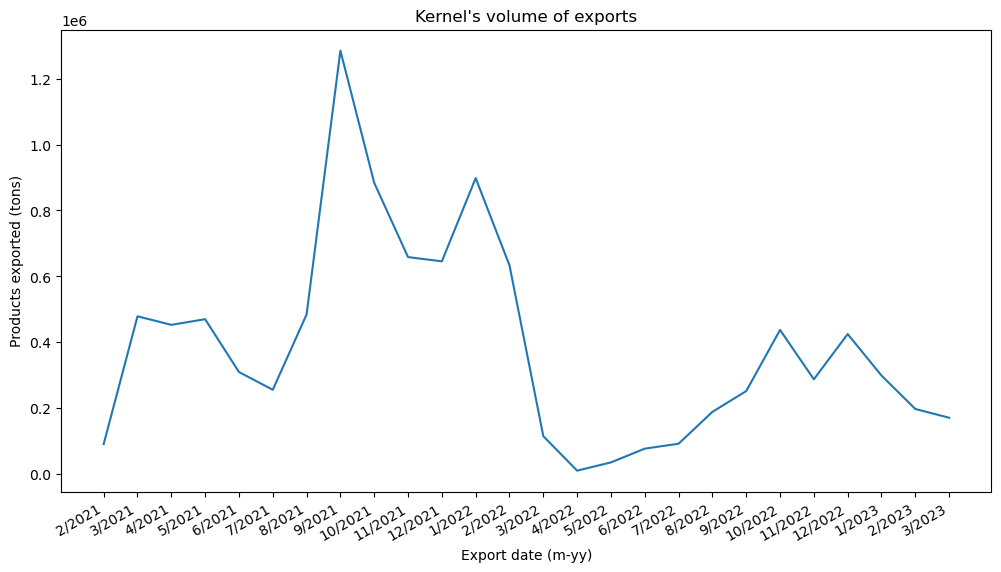

In [8]:
kernel_c["year"] = kernel_c["EXPORT DATE"].dt.year
kernel_c["month"] = kernel_c["EXPORT DATE"].dt.month
kernel_c["weight_ton"] = kernel_c["WEIGHT (KG)"] / 1000

kernel_g = kernel_c[["year", "month", "weight_ton"]].groupby(["year", "month"])
kernel_g = kernel_g.sum().reset_index()
kernel_g.sort_values(by=["year", "month"], ascending=False)

kernel_g["date"] = kernel_g["month"].astype(str) + "/" + kernel_g["year"].astype(str)
kernel_g

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(kernel_g["date"] , kernel_g["weight_ton"])
# ax.ticklabel_format(useOffset=False, style='plain')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.title("Kernel's volume of exports")
plt.xlabel("Export date (m-yy)")
plt.ylabel("Products exported (tons)")

print("Kernel exports:\n", kernel_g)

Text(0, 0.5, 'Products exported (tons)')

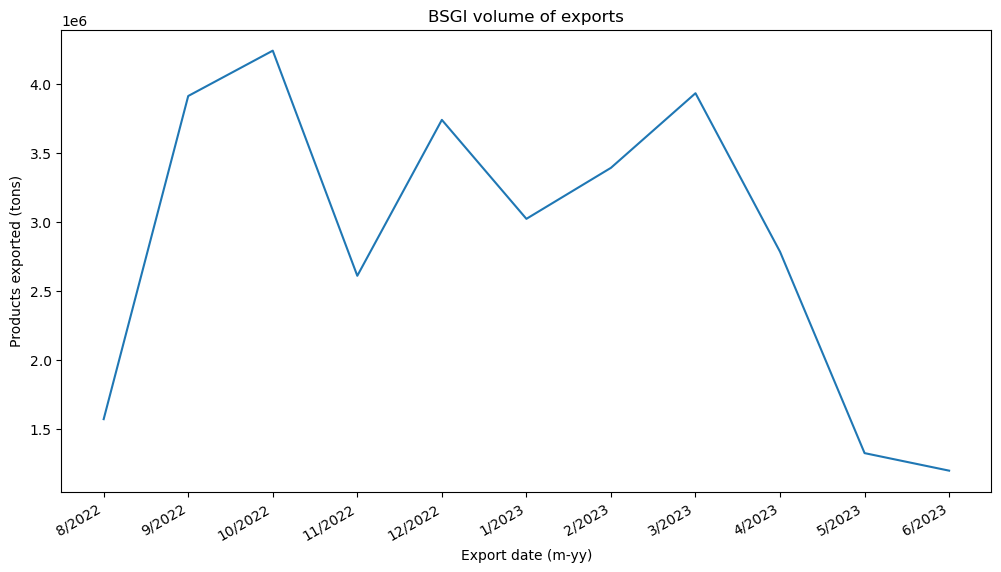

In [9]:
# Compare Kernel's exports with overall exports in the Black Sea ports from Black Sea Grain Initiative

outbound = pd.read_csv("../data/bsgi_outbound_shipments.csv", thousands=",", parse_dates=["Departure date"])

outbound["year"] = outbound["Departure date"].dt.year
outbound["month"] = outbound["Departure date"].dt.month
outbound["weight_ton"] = outbound["Metric tons"]

outbound_g = outbound[["year", "month", "weight_ton"]].groupby(["year", "month"])
outbound_g = outbound_g.sum().reset_index()
outbound_g.sort_values(by=["year", "month"], ascending=False)

outbound_g["date"] = outbound_g["month"].astype(str) + "/" + outbound_g["year"].astype(str)
outbound_g

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(outbound_g["date"] , outbound_g["weight_ton"])

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.title("BSGI volume of exports")
plt.xlabel("Export date (m-yy)")
plt.ylabel("Products exported (tons)")


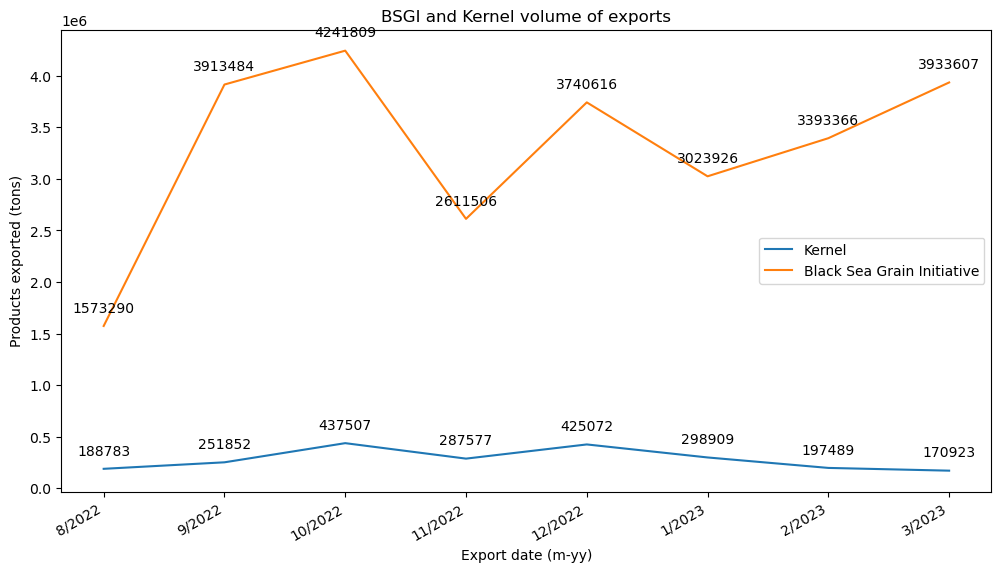

In [10]:
# Plot together
final = kernel_g.merge(outbound_g, on="date", suffixes=("_kernel", "_bsgi"))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(final["date"] , final["weight_ton_kernel"], label = "Kernel")
ax.plot(final["date"] , final["weight_ton_bsgi"], label = "Black Sea Grain Initiative")

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.title("BSGI and Kernel volume of exports")
plt.xlabel("Export date (m-yy)")
plt.ylabel("Products exported (tons)")
plt.legend()

# Annotate the lines
for x, y in zip(final["date"], final["weight_ton_kernel"]):
    ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

for x, y in zip(final["date"], final["weight_ton_bsgi"]):
    ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

In [85]:
# PLOT BY CROP

# First we see the possible product categories based on the BSGI dataset
products = outbound["Commodity"].unique()

products_val = ["corn", "soya", "sunflower", "wheat", "sunflower", "barley", "peas", "rapeseed", "sunflower", "vegetable", "soya", "canola", "rapeseed", "sunflower", "mixed", "wheat", "sugar beet"]

d = {}
for i, product in enumerate(products):
    d[product] = products_val[i]

outbound_c = outbound.copy()

outbound_c["product_std"] = outbound_c["Commodity"].apply(lambda x: d[x])
print("Outbound data:\n", outbound_c.head())

product_std = set(products_val)

# We create columns for each product
for product in product_std:
    kernel_c[product] = kernel_c["product_en"].apply(lambda x: True if product in x.lower() else False)

kernel_c


Outbound data:
        Status    #       Vessel name      IMO Departure port Country  \
0    Outbound  981       SSI AVENGER  9284544    Chornomorsk   Spain   
1  Outbound +  981       SSI AVENGER  9284544    Chornomorsk  France   
2    Outbound  980  SANTORINI ISLAND  9393618    Chornomorsk   Italy   
3    Outbound  979          EUROSTAR  9546203    Chornomorsk   China   
4    Outbound  978              DIAS  9248904          Odesa   China   

        Commodity  Metric tons Departure date Inspection cleared  \
0            Corn        18137     2023-06-14                NaN   
1      Soya beans        28963     2023-06-14                NaN   
2            Corn        45486     2023-06-14                NaN   
3  Sunflower meal        29188     2023-06-14                NaN   
4            Corn        66000     2023-06-14                NaN   

          Income group              Flag      World Bank region  \
0          high-income  Marshall Islands  Europe & Central Asia   
1       

,Unnamed: 0,PRODUCT,HS CODE,CONSIGNEE,CONSIGNEE ADDRESS,SHIPPER,SHIPPER ADDRESS,EXPORT DATE,QUANTITY,WEIGHT (KG),...,soya,sunflower,wheat,barley,peas,rapeseed,vegetable,canola,mixed,sugar beet
0,0,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,OMANI GULF FOOD COMPANY LLC P O BOX 43 P C 217...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23930.0000,...,False,True,False,False,False,False,False,False,False,False
1,1,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,OMANI GULF FOOD COMPANY LLC P O BOX 43 P C 217...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23930.0000,...,False,True,False,False,False,False,False,False,False,False
2,2,СОЛІ ТА ГІДРОКСИДИ АМОНІЮ ЧЕТВЕРТИННІ; ЛЕЦИТИН...,2923200000,NATEEO SRL VIA DELL INNOVAZIONE N 1 36043 CAMI...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23700.0000,...,False,False,False,False,False,False,False,False,False,False
3,3,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,SENAME SARL NO3 ILOT I SCAT URBAM HANN MARISTE...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,24380.0000,...,False,True,False,False,False,False,False,False,False,False
4,4,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,OMANI GULF FOOD COMPANY LLC P O BOX 43 P C 217...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВУЛОК ШЕВЧЕНК...,NaN,2023-03-31,NaN,23950.0000,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,"ОЛІЇ СОНЯШНИКОВА, САФЛОРОВА АБО БАВОВНЯНА ТА Ї...",1512199010,TSP TRADING SARL LEBANON JOUNIEH FREM BUILDING,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 М КИЇВ ПРОВ ШЕВЧЕНКА ТА...,NaN,2021-02-25,NaN,25191.9000,...,False,True,False,False,False,False,False,False,False,False
9996,9996,"МАКУХА ТА ІНШІ ТВЕРДІ ВІДХОДИ І ЗАЛИШКИ, ОДЕРЖ...",2306300000,ООО СОЙТЭКС 220125 РЕСПУБЛИКА БЕЛАРУСЬ Г МИНСК...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 УКРАЇНА М КИЇВ ПРОВ ШЕВ...,NaN,2021-02-25,NaN,360350.0000,...,False,True,False,False,False,False,True,False,False,False
9997,9997,"МАКУХА ТА ІНШІ ТВЕРДІ ВІДХОДИ І ЗАЛИШКИ, ОДЕРЖ...",2306300000,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ АГРОГ...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 УКРАЇНА М КИЇВ ПРОВ ШЕВ...,NaN,2021-02-25,NaN,243700.0000,...,False,True,False,False,False,False,True,False,False,False
9998,9998,"МАКУХА ТА ІНШІ ТВЕРДІ ВІДХОДИ І ЗАЛИШКИ, ОДЕРЖ...",2306300000,СЗАО АГРОЛИНК РЕСПУБЛИКА БЕЛАРУСЬ 213353 МOГИЛ...,NaN,ТОВ КЕРНЕЛ ТРЕЙД 01001 УКРАЇНА М КИЇВ ПРОВ ШЕВ...,NaN,2021-02-25,NaN,179650.0000,...,False,True,False,False,False,False,True,False,False,False


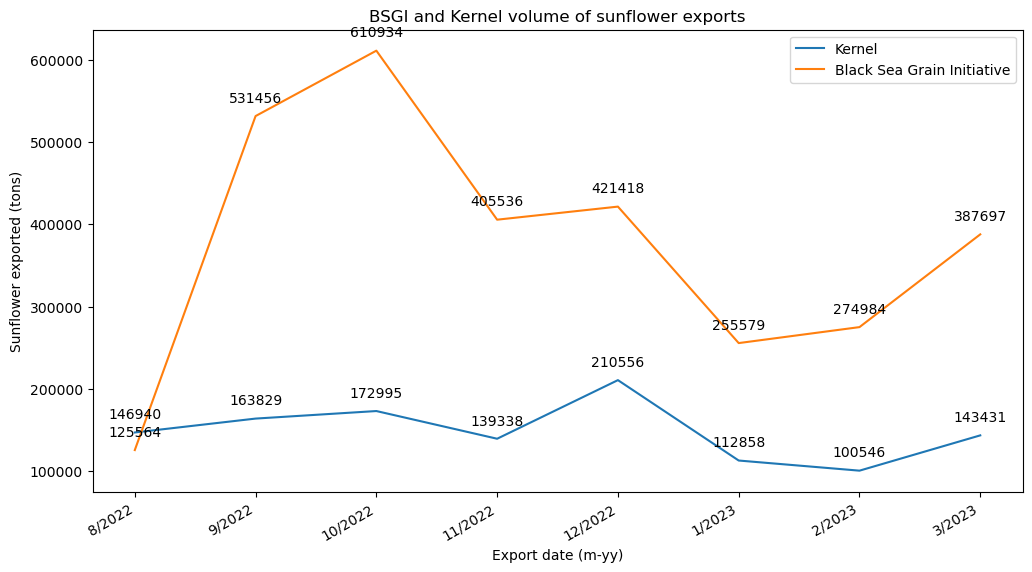

In [96]:
# Plot for sunflower

# Import Genius data
sunflower_kernel = kernel_c.loc[kernel_c.loc[:, "sunflower"] == True]

kernel_g = sunflower_kernel[["year", "month", "weight_ton"]].groupby(["year", "month"])
kernel_g = kernel_g.sum().reset_index()
kernel_g.sort_values(by=["year", "month"], ascending=False)

kernel_g["date"] = kernel_g["month"].astype(str) + "/" + kernel_g["year"].astype(str)

# BSGI data
sunflower_bsgi = outbound_c.loc[outbound_c.loc[:, "product_std"] == "sunflower"]

outbound_g = sunflower_bsgi[["year", "month", "weight_ton"]].groupby(["year", "month"])
outbound_g = outbound_g.sum().reset_index()
outbound_g.sort_values(by=["year", "month"], ascending=False)

outbound_g["date"] = outbound_g["month"].astype(str) + "/" + outbound_g["year"].astype(str)

# Plot together
final = kernel_g.merge(outbound_g, on="date", suffixes=("_kernel", "_bsgi"))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(final["date"] , final["weight_ton_kernel"], label = "Kernel")
ax.plot(final["date"] , final["weight_ton_bsgi"], label = "Black Sea Grain Initiative")

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.title("BSGI and Kernel volume of sunflower exports")
plt.xlabel("Export date (m-yy)")
plt.ylabel("Sunflower exported (tons)")
plt.legend()

# Annotate the lines
for x, y in zip(final["date"], final["weight_ton_kernel"]):
    ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

for x, y in zip(final["date"], final["weight_ton_bsgi"]):
    ax.annotate(f'{int(y)}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

In [70]:
lemmatizer = WordNetLemmatizer()

tokens = word_tokenize("SUNFLOWER, SAFFLOWER OR COTTON OILS AND THEIR FRACTIONS, WHETHER OR NOT REFINED BUT NOT CHEMICALLY CHANGED: - SUNFLOWER OR SAFFLOWER OILS AND THEIR FRACTIONS: - - OTHER: - - - OTHER: - - - - SUNFLOWER")
print("tokens:\n", tokens)
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print("lemmatized_tokens:\n", lemmatized_tokens)

products = outbound["Commodity"].unique()
print("products:\n", products)
lemmatized_tokens_bsgi = [lemmatizer.lemmatize(product) for product in products]
print("lemmatized_tokens_bsgi:\n", lemmatized_tokens_bsgi)
' '.join(lemmatized_tokens)


tokens:
 ['SUNFLOWER', ',', 'SAFFLOWER', 'OR', 'COTTON', 'OILS', 'AND', 'THEIR', 'FRACTIONS', ',', 'WHETHER', 'OR', 'NOT', 'REFINED', 'BUT', 'NOT', 'CHEMICALLY', 'CHANGED', ':', '-', 'SUNFLOWER', 'OR', 'SAFFLOWER', 'OILS', 'AND', 'THEIR', 'FRACTIONS', ':', '-', '-', 'OTHER', ':', '-', '-', '-', 'OTHER', ':', '-', '-', '-', '-', 'SUNFLOWER']
lemmatized_tokens:
 ['SUNFLOWER', ',', 'SAFFLOWER', 'OR', 'COTTON', 'OILS', 'AND', 'THEIR', 'FRACTIONS', ',', 'WHETHER', 'OR', 'NOT', 'REFINED', 'BUT', 'NOT', 'CHEMICALLY', 'CHANGED', ':', '-', 'SUNFLOWER', 'OR', 'SAFFLOWER', 'OILS', 'AND', 'THEIR', 'FRACTIONS', ':', '-', '-', 'OTHER', ':', '-', '-', '-', 'OTHER', ':', '-', '-', '-', '-', 'SUNFLOWER']
products:
 ['Corn' 'Soya beans' 'Sunflower meal' 'Wheat' 'Sunflower oil' 'Barley'
 'Peas' 'Rapeseed' 'Sunflower seed' 'Vegetable oil' 'Soya oil' 'Canola'
 'Rapeseed meal' 'Sunflower pellets' 'Mixed' 'Wheat bran pellets'
 'Sugar beet pellets']
lemmatized_tokens_bsgi:
 ['Corn', 'Soya beans', 'Sunflower m

'SUNFLOWER , SAFFLOWER OR COTTON OILS AND THEIR FRACTIONS , WHETHER OR NOT REFINED BUT NOT CHEMICALLY CHANGED : - SUNFLOWER OR SAFFLOWER OILS AND THEIR FRACTIONS : - - OTHER : - - - OTHER : - - - - SUNFLOWER'